In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
# Loading the dataset into the notebook

data = pd.read_csv("lms.csv")
data

,user_id,assignments_viewed,assignments_submitted,quiz_started,quiz_submitted,quiz_reviewed,quiz_viewed,forums_viewed,page_views,resources_viewed,quiz_1,quiz_2,assignment,project,final_exam,total_score
0,16,18,1,4,4,3,104,37,5,19,5.0,2.94,8,0,0.00,15.94
1,17,52,2,3,3,2,125,50,10,6,4.0,3.82,6,20,37.67,71.49
2,18,134,4,3,2,1,170,289,37,61,3.5,2.21,5,14,26.67,51.37
3,19,134,3,3,3,2,139,30,0,30,4.0,2.30,5,14,31.17,56.47
4,20,38,2,3,3,12,142,35,12,12,3.0,3.82,10,20,35.33,72.16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225,441,4,0,0,0,0,1,0,0,12,0.0,0.00,0,0,0.00,0.00
226,449,69,2,2,2,2,60,0,0,6,4.5,1.18,5,8,32.67,51.34
227,450,37,2,2,2,1,46,3,1,36,5.0,4.12,7,15,26.50,57.62
228,451,68,1,1,1,0,66,79,7,26,0.0,2.40,2,0,44.00,48.40


In [3]:
# Description of the data

data.describe()

,user_id,assignments_viewed,assignments_submitted,quiz_started,quiz_submitted,quiz_reviewed,quiz_viewed,forums_viewed,page_views,resources_viewed,quiz_1,quiz_2,assignment,project,final_exam,total_score
count,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000,230.00000,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000
mean,194.469565,38.843478,1.473913,2.204348,2.191304,6.460870,88.986957,38.086957,2.96087,18.213043,3.204348,2.361130,3.834783,8.743478,18.081304,36.225087
std,118.747012,37.734788,1.256153,1.330521,1.340636,12.320528,71.130883,38.692735,6.08120,17.820130,1.834763,1.774107,3.298618,9.165119,17.059011,29.296080
min,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,93.250000,11.000000,0.000000,1.000000,1.000000,1.000000,34.000000,9.250000,0.00000,3.250000,2.125000,0.000000,0.000000,0.000000,0.000000,5.085000
50%,181.000000,32.000000,1.000000,2.000000,2.000000,2.000000,81.500000,29.000000,0.00000,12.000000,4.000000,2.940000,4.000000,8.000000,24.415000,47.490000
75%,276.750000,56.000000,2.000000,3.000000,3.000000,7.000000,138.500000,53.000000,3.00000,28.750000,5.000000,3.820000,6.000000,18.000000,33.670000,61.822500
max,452.000000,215.000000,6.000000,7.000000,7.000000,91.000000,346.000000,289.000000,37.00000,102.000000,5.000000,5.000000,10.000000,28.000000,49.500000,91.410000


In [4]:
# Checking for missing values

missing_values = data.isnull().sum()
print(missing_values)

user_id                  0
assignments_viewed       0
assignments_submitted    0
quiz_started             0
quiz_submitted           0
quiz_reviewed            0
quiz_viewed              0
forums_viewed            0
page_views               0
resources_viewed         0
quiz_1                   0
quiz_2                   0
assignment               0
project                  0
final_exam               0
total_score              0
dtype: int64


In [5]:
# Checking for duplicate data

print("\nIndices of duplicate rows:")
print(data[data.duplicated()].index)


Indices of duplicate rows:
Index([], dtype='int64')


In [6]:
# Splitting data into features and target variable

X = data[['assignments_viewed', 'assignments_submitted', 'quiz_started', 'quiz_submitted', 
          'quiz_reviewed', 'quiz_viewed', 'forums_viewed', 'page_views', 'resources_viewed','quiz_1','quiz_2','assignment','project','final_exam']]
y = data['total_score']  # Target variable

In [7]:
# Splitting the dataset into testing and training sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Model training

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [9]:
y_pred = model.predict(X_test)

In [10]:
# Calculate regression evaluation metrics

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)  # Calculate RMSE by setting squared=False
r2 = r2_score(y_test, y_pred)

# Print regression evaluation metrics
print("Regression Evaluation Metrics:")
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)

Regression Evaluation Metrics:
Mean Absolute Error (MAE): 0.0013136113886404164
Mean Squared Error (MSE): 7.331248302232348e-06
Root Mean Squared Error (RMSE): 0.0027076277997967794
R-squared (R2): 0.9999999915682222


In [11]:
# Checking feature significance

coef_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
coef_df.sort_values(by='Coefficient', ascending=False, inplace=True)

print("\nFeature Significance:")
print(coef_df)


Feature Significance:
                  Feature  Coefficient
11             assignment     1.000246
10                 quiz_2     1.000120
9                  quiz_1     1.000090
13             final_exam     1.000018
12                project     0.999945
3          quiz_submitted     0.002022
1   assignments_submitted     0.000393
7              page_views     0.000076
4           quiz_reviewed     0.000030
8        resources_viewed     0.000002
5             quiz_viewed    -0.000008
0      assignments_viewed    -0.000012
6           forums_viewed    -0.000020
2            quiz_started    -0.002343


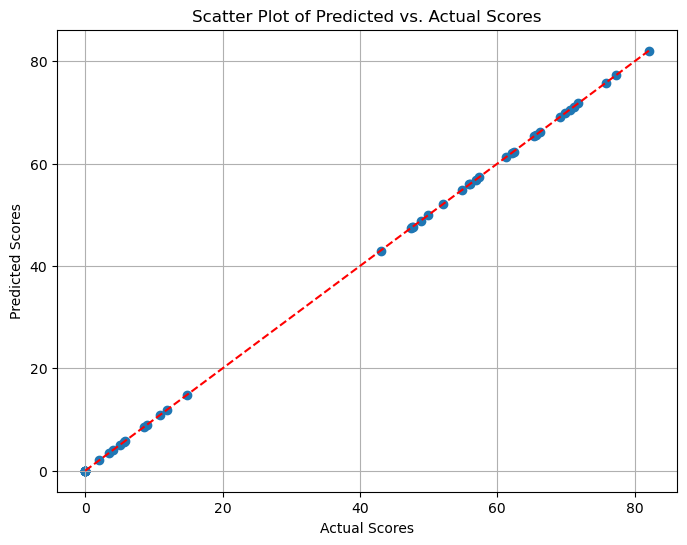

In [12]:
# Scatter plot of predicted vs. Actual scores
# Gives an understanding of how well the model performs in predicting the end-of-semester academic performance.

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red')  # Perfect prediction line
plt.xlabel('Actual Scores')
plt.ylabel('Predicted Scores')
plt.title('Scatter Plot of Predicted vs. Actual Scores')
plt.grid(True)
plt.show()

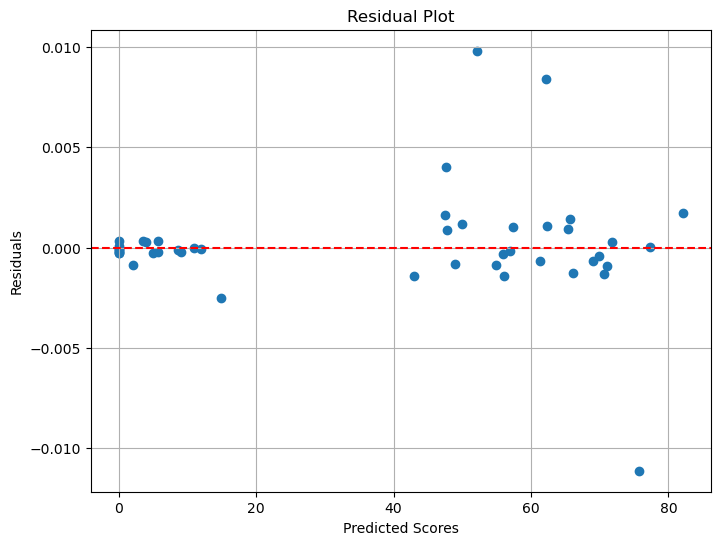

In [13]:
# Residual plot
# Residual is the differences between actual and predicted values.
# Helps to detect patterns in the residuals and assess the model's performance.

residuals = y_test - y_pred

plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Scores')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.grid(True)
plt.show()

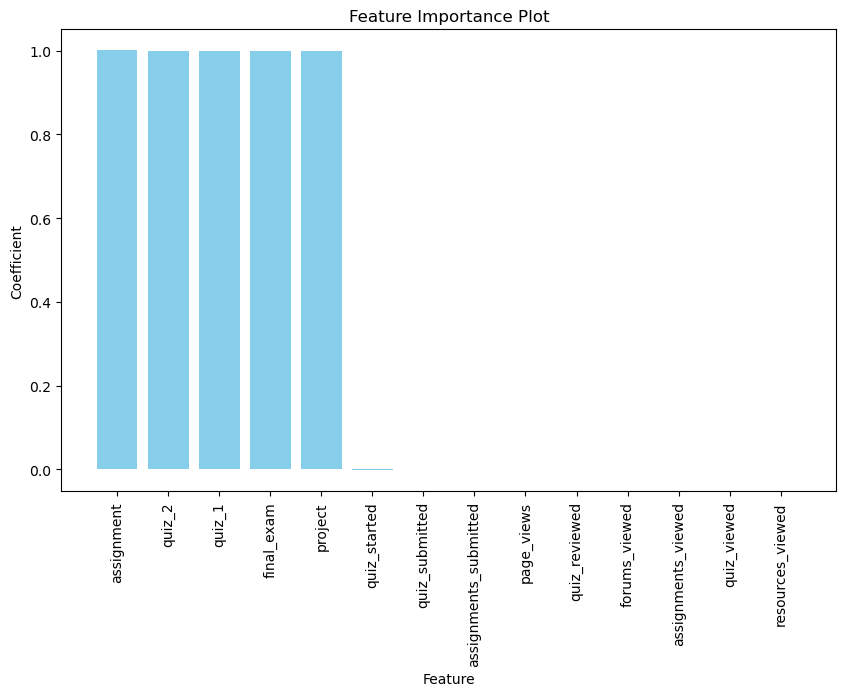

In [14]:
# Feature importance plot
# Coefficient is the weight assigned to each feature (x independent variable) in the model.
# Use the coeficicients of the model to provide insights into the importance of each feature in predicting the end-of-semester academic performance.

plt.figure(figsize=(10, 6))
sorted_indices = coef_df['Coefficient'].abs().sort_values(ascending=False).index
plt.bar(range(len(sorted_indices)), coef_df['Coefficient'][sorted_indices], color='skyblue')
plt.xticks(range(len(sorted_indices)), coef_df['Feature'][sorted_indices], rotation=90)
plt.xlabel('Feature')
plt.ylabel('Coefficient')
plt.title('Feature Importance Plot')
plt.show()


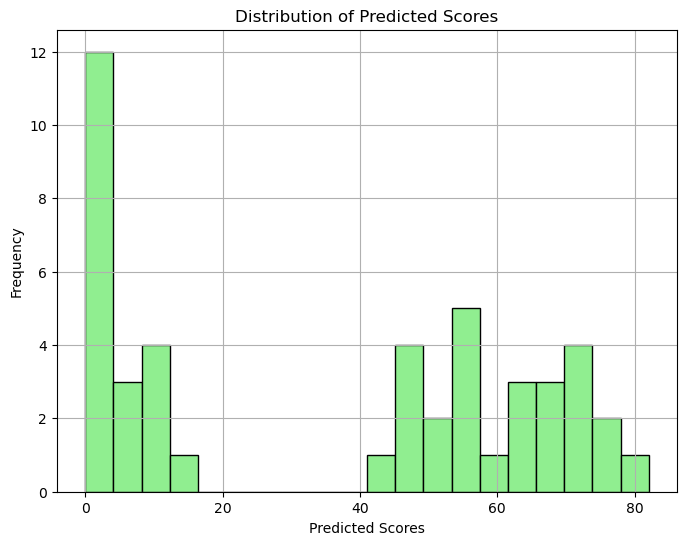

In [15]:
# Distibution of predicted scores
# Gives an overview of how the model predicts the end-of-semester academic performance across different score ranges.

plt.figure(figsize=(8, 6))
plt.hist(y_pred, bins=20, color='lightgreen', edgecolor='black')
plt.xlabel('Predicted Scores')
plt.ylabel('Frequency')
plt.title('Distribution of Predicted Scores')
plt.grid(True)
plt.show()

In [16]:
import pickle
#Save the model using pickle
with open('linear_regression_model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)